### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this

In [3]:
date = "24-12-10"
pathfile = f"Pulling data/{date}/triple/"

### From here; automatic run

In [4]:
root = f"/Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/{pathfile}"

MODE = "triple"
min_break_extension=40

In [5]:
if not root.endswith("/"):
    root += "/"

In [6]:
sep_category = "$" # separates categories like date, experiments, etc
sep_count = "%" # separated the number of hairs by experiment

In [7]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241210$IHNY$25%AAsctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$triple.txt
20241210$IHNY$25%phosctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$triple.txt
20241210$IHNY$25%AActrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$triple.txt
20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$triple.txt


In [8]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [9]:
all_dfs = []
# we add a prefix to name, so if two experiments have the same name in two files
# that are plotted together, they don't get merge because of the same name
prefix = "A"
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=2)

        # clean the df
        if MODE in file:
            df = plotting.clean_triple(df)
            assert "triple" in file
        else:
            raise ValueError(f"Not a {MODE} experiment")
        
        splitted_name = file.split(sep_category)
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[2:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split(sep_count)
            _times = int(times_name[0])
            _name = times_name[1]
            _name = prefix + "_" + _name
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        # remove all the break extension below threshold 
        df = df[df['BREAK EXT'] >= min_break_extension]
        
        all_dfs.append(df)

        # update prefix
        prefix = chr(ord(prefix) + 1)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241210$IHNY$25%AAsctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$triple.txt
20241210$IHNY$25%phosctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$triple.txt
20241210$IHNY$25%AActrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$triple.txt
20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$triple.txt


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,TOTAL WORK,TOUGHNESS,Name
0,1.0,2608.7,58.0,63.4,52.4,3.651,31.97,2.77,0.01148,31.19,...,0.01298,0.002253,21.60,1.211,41.75,41.15,154.650871,0.004055,51180000.0,A_AAsctrl
3,4.0,1998.8,50.7,55.7,45.7,4.082,27.26,3.08,0.01378,28.86,...,0.01478,0.002038,30.19,1.567,58.11,43.75,214.667569,0.005669,92960000.0,A_AAsctrl
4,5.0,3451.4,67.8,76.2,57.7,4.134,48.08,3.21,0.01369,48.35,...,0.01452,0.003421,25.55,2.939,49.26,69.50,197.505931,0.007659,73360000.0,A_AAsctrl
5,6.0,2487.4,56.1,60.0,52.8,4.356,36.58,2.88,0.01337,33.89,...,0.01411,0.002387,27.33,1.792,53.23,48.65,191.818074,0.005858,78010000.0,A_AAsctrl
6,7.0,6052.3,89.9,102.1,75.6,4.120,84.06,3.11,0.01297,82.23,...,0.01442,0.005784,24.40,5.205,46.96,117.50,190.347077,0.012340,67400000.0,A_AAsctrl


Statistical significance between A_AAsctrl and A_pk30 0.03: p = 0.0135
Statistical significance between A_AAsctrl and B_pk30 0.05: p = 0.0112
Statistical significance between A_pk30 0.03 and C_ kp 0.01: p = 0.0411
Statistical significance between A_pk30 0.03 and C_ kp 0.05: p = 0.0343
Statistical significance between A_pk30 0.03 and D_kp 0.03: p = 0.0128
Statistical significance between A_pk30 0.03 and D_ kp 0.05: p = 0.0162
Statistical significance between B_pk30 0.05 and C_ kp 0.05: p = 0.0197
Statistical significance between B_pk30 0.05 and D_kp 0.03: p = 0.0164
Statistical significance between B_pk30 0.05 and D_ kp 0.05: p = 0.0120
0 removed data points for MEAN DIAMETER


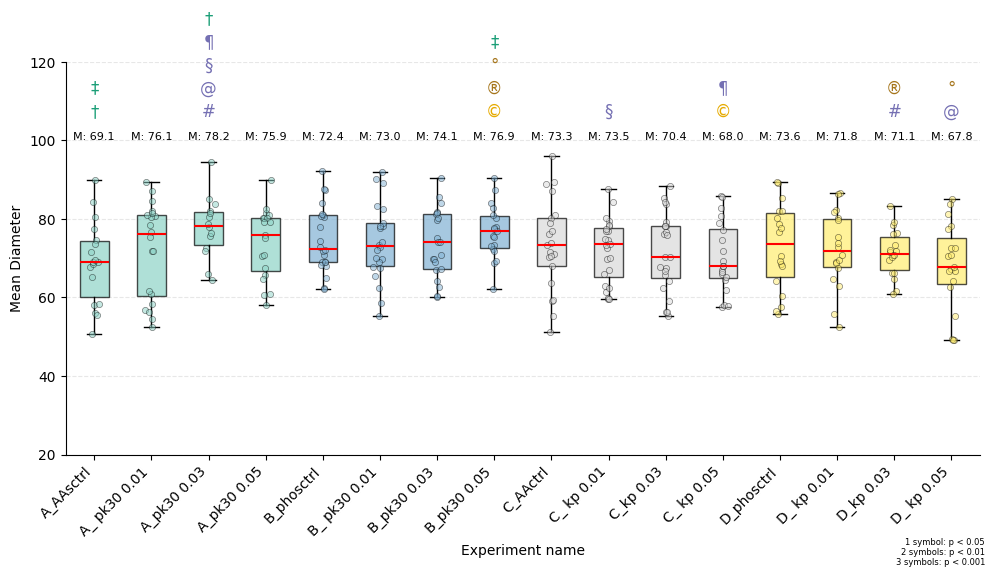

In [10]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_ pk30 0.01 and D_phosctrl: p = 0.0136
Statistical significance between A_ pk30 0.01 and D_ kp 0.01: p = 0.0498
Statistical significance between A_pk30 0.05 and D_phosctrl: p = 0.0050
Statistical significance between A_pk30 0.05 and D_ kp 0.01: p = 0.0218
Statistical significance between A_pk30 0.05 and D_kp 0.03: p = 0.0255
Statistical significance between B_phosctrl and D_phosctrl: p = 0.0286
Statistical significance between B_pk30 0.03 and D_phosctrl: p = 0.0236
Statistical significance between B_pk30 0.05 and D_phosctrl: p = 0.0099
Statistical significance between B_pk30 0.05 and D_ kp 0.01: p = 0.0217
Statistical significance between B_pk30 0.05 and D_kp 0.03: p = 0.0465
Statistical significance between C_ kp 0.01 and D_phosctrl: p = 0.0090
Statistical significance between C_ kp 0.01 and D_ kp 0.01: p = 0.0276
Statistical significance between C_kp 0.03 and D_phosctrl: p = 0.0112
Statistical significance between C_kp 0.03 and D_ kp 0.01: p = 0.0334

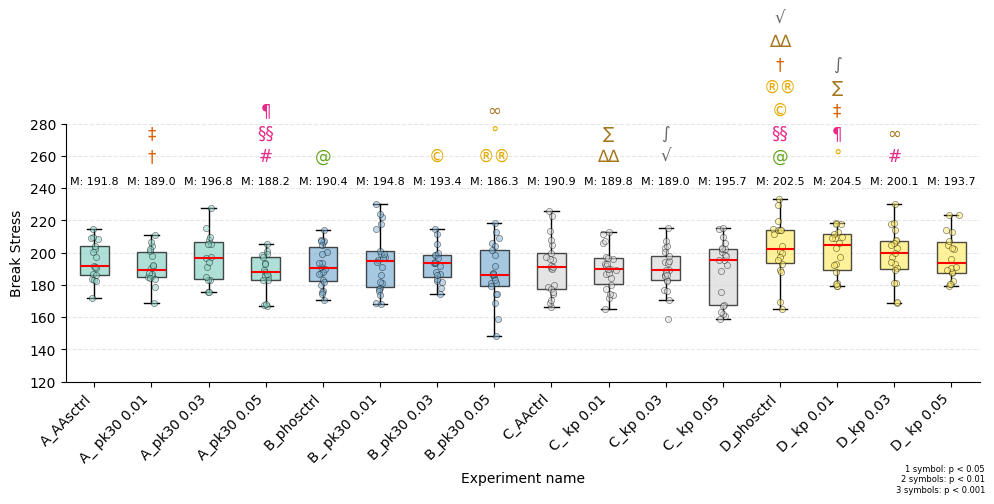

In [11]:
header = 'BREAK STRESS'
ymin = 120
ymax = 280
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_ pk30 0.01 and A_pk30 0.05: p = 0.0119
Statistical significance between A_ pk30 0.01 and C_AActrl: p = 0.0294
Statistical significance between A_ pk30 0.01 and D_phosctrl: p = 0.0186
Statistical significance between A_ pk30 0.01 and D_ kp 0.01: p = 0.0294
Statistical significance between A_ pk30 0.01 and D_kp 0.03: p = 0.0416
Statistical significance between A_ pk30 0.01 and D_ kp 0.05: p = 0.0316
Statistical significance between A_pk30 0.05 and B_pk30 0.03: p = 0.0486
Statistical significance between A_pk30 0.05 and B_pk30 0.05: p = 0.0384
0 removed data points for TOUGHNESS


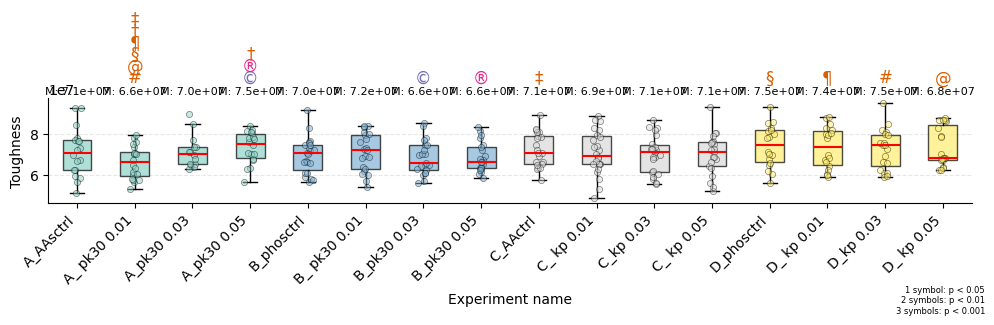

In [12]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_AAsctrl and A_pk30 0.03: p = 0.0345
Statistical significance between A_pk30 0.03 and C_kp 0.03: p = 0.0393
Statistical significance between A_pk30 0.03 and C_ kp 0.05: p = 0.0080
Statistical significance between A_pk30 0.03 and D_ kp 0.05: p = 0.0443
Statistical significance between B_phosctrl and C_ kp 0.05: p = 0.0333
Statistical significance between B_pk30 0.05 and C_ kp 0.05: p = 0.0406
Statistical significance between C_ kp 0.05 and D_kp 0.03: p = 0.0393
0 removed data points for ELASTIC GRADIENT


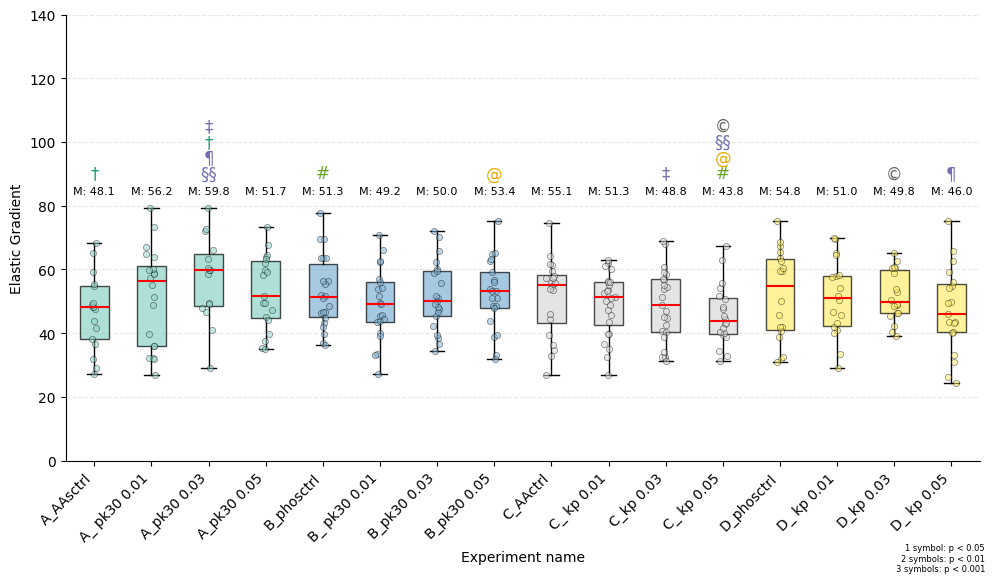

In [13]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_AAsctrl and B_phosctrl: p = 0.0117
Statistical significance between A_AAsctrl and B_ pk30 0.01: p = 0.0148
Statistical significance between A_AAsctrl and C_ kp 0.01: p = 0.0431
Statistical significance between A_ pk30 0.01 and B_phosctrl: p = 0.0008
Statistical significance between A_ pk30 0.01 and B_ pk30 0.01: p = 0.0029
Statistical significance between A_ pk30 0.01 and B_pk30 0.03: p = 0.0335
Statistical significance between A_ pk30 0.01 and C_ kp 0.01: p = 0.0064
Statistical significance between A_ pk30 0.01 and C_kp 0.03: p = 0.0182
Statistical significance between A_ pk30 0.01 and C_ kp 0.05: p = 0.0170
Statistical significance between A_pk30 0.03 and B_phosctrl: p = 0.0001
Statistical significance between A_pk30 0.03 and B_ pk30 0.01: p = 0.0008
Statistical significance between A_pk30 0.03 and B_pk30 0.03: p = 0.0209
Statistical significance between A_pk30 0.03 and C_ kp 0.01: p = 0.0013
Statistical significance between A_pk30 0.03 and C_kp 0.0

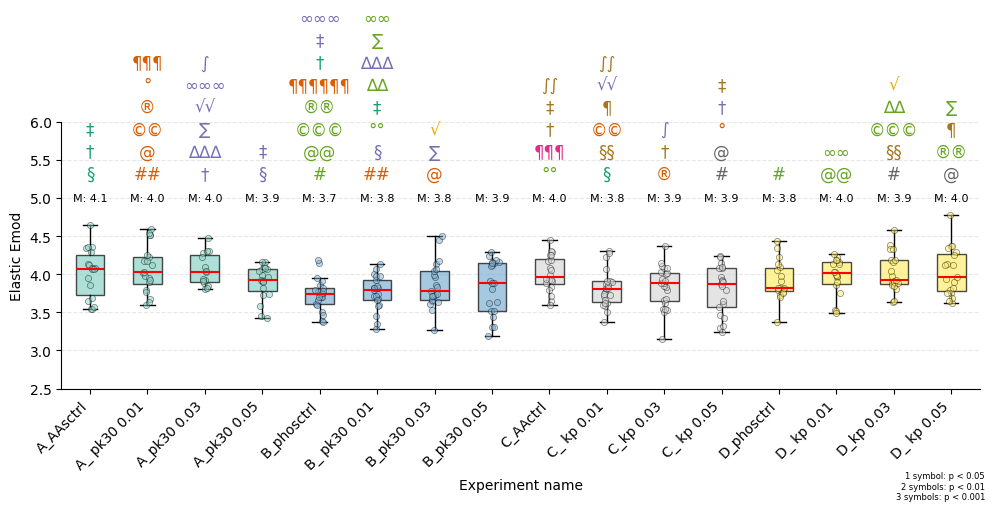

In [14]:
header = 'ELASTIC EMOD'
ymin = 2.5
ymax =  6.0
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

### Scatter plots with correlation

In [15]:
df_merged.columns

Index(['RECORD', 'CROSS-SECTIONAL AREA', 'MEAN DIAMETER', 'MAX DIAMETER',
       'MIN DIAMETER', 'ELASTIC EMOD', 'ELASTIC GRADIENT', 'ELASTIC EXT',
       'ELASTIC STRESS', 'PLATEAU LOAD', 'PLATEAU STRESS', 'LOAD 15%',
       'STRESS 15%', 'WORK 15%', 'LOAD 25%', 'STRESS 25%', 'WORK 25%',
       'YIELD EXT', 'POSTYIELD GRADIENT', 'BREAK EXT', 'BREAK LOAD',
       'BREAK STRESS', 'TOTAL WORK', 'TOUGHNESS', 'Name'],
      dtype='object', name=0)

NameError: name 'os' is not defined

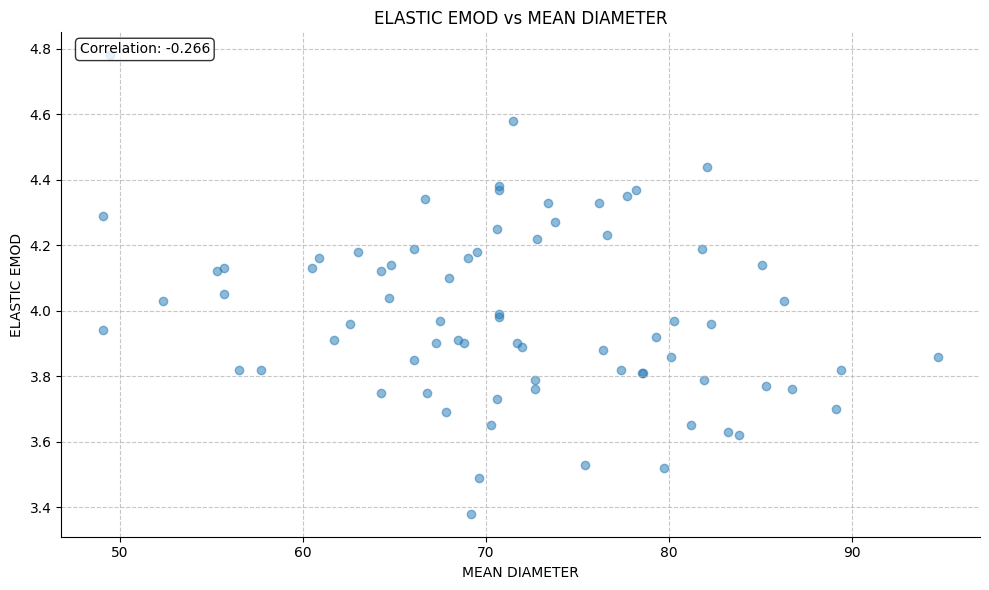

In [16]:
y_col = 'ELASTIC EMOD'
x_col = 'MEAN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'ELASTIC EMOD'
x_col = 'MAX DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'ELASTIC EMOD'
x_col = 'MIN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'BREAK STRESS'
x_col = 'MEAN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'BREAK STRESS'
x_col = 'MAX DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

In [ ]:
y_col = 'BREAK STRESS'
x_col = 'MIN DIAMETER'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)